In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [2]:
# Step 1: Load the InceptionV3 model without the top fully connected layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Step 2: Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Step 3: Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 4: Preprocess data
# Resize images to fit the input size for InceptionV3 (75x75x3)
x_train = tf.image.resize(tf.stack([x_train] * 3, axis=-1), (75, 75))
x_test = tf.image.resize(tf.stack([x_test] * 3, axis=-1), (75, 75))
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

# Normalize labels to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Step 5: Define the new classifier
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

# Combine the base model and the new classifier
model = Model(inputs=base_model.input, outputs=x)

# Step 6: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# Step 7: Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=32)

# Step 8: Evaluate the model
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 22ms/step - accuracy: 0.8358 - loss: 0.5027 - val_accuracy: 0.9140 - val_loss: 0.2673
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 19ms/step - accuracy: 0.9306 - loss: 0.2125 - val_accuracy: 0.9326 - val_loss: 0.2183
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9439 - loss: 0.1692 - val_accuracy: 0.9268 - val_loss: 0.2215
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9556 - loss: 0.1356 - val_accuracy: 0.9335 - val_loss: 0.2105
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9599 - loss: 0.1174 - val_accuracy: 0.9345 - val_loss: 0.2122
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.9270 - loss: 0.2315
Validation Loss: 0.2227121889591217, Validation Accuracy: 0.9311000108718872


Training complete. Here is the model performance:
Final Validation Accuracy: 0.9311000108718872
Final Validation Loss: 0.2227121889591217


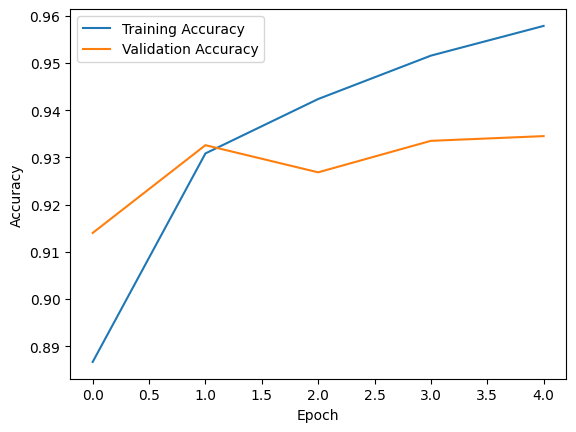

In [5]:
# Step 9: Report and analyze performance
print("Training complete. Here is the model performance:")
print(f"Final Validation Accuracy: {val_accuracy}")
print(f"Final Validation Loss: {val_loss}")

# Visualize the training progress
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()